## exercise 1

The pvalue tells you given that the null hypothesis is correct, how likely it is to observe the alternate hypothesis or something more extreme than that. For the previous example, the p value turned out to be 2%. Many practitioners consider a threshold of 5% to consider the observation significant.

1. Your task is to find a way to reduce the p value to below 1%.
2. Can you reduce p value to less than 0.1%?
3. Spolier alert! You can. But does this exercise imply? We can keep reducing the p value and hence making any observation significant. Is there a limit to it?

## exercise 2

Do the same practice for revenue per user.

1. assume two distributions.
2. assume one distribution as the null hypythesis and the other as the alternative.
3. compute sampling distributions.
4. compute p value
5. try to reduce the p value by the trick of the previous exercise.
6. Discuss if there is a limit to it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class CTR:
    def __init__(self, population_ctr, seed=1):
        self.population_ctr = population_ctr
        self.rs = np.random.RandomState(seed)

    def __call__(self, sample_size):
        rns = self.rs.binomial(1, self.population_ctr, sample_size)
        return np.mean(rns)

In [3]:
get_ctr_a = CTR(0.37, seed=1)
get_ctr_b = CTR(0.5, seed=1)


Null hypothesis: there is no difference between average CTRs of these two websites

Alternative hypothesis: average CTR of b website is larger than that of a


In [4]:
ctrs_diff_null = [get_ctr_a(200) - get_ctr_a(200) for _ in range(10_000)]
ctrs_diff_obs = [get_ctr_b(200) - get_ctr_a(200) for _ in range(10_000)]

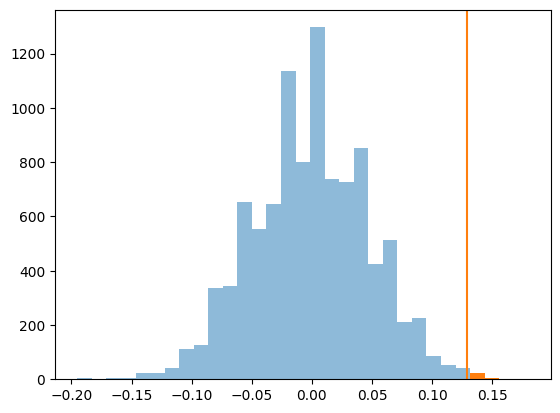

In [5]:
plt.hist(ctrs_diff_null, bins=31, alpha=0.5)
_, _, bars = plt.hist(ctrs_diff_null, bins=31)
for i in range(27):
    bars[i].remove()
plt.axvline(np.mean(ctrs_diff_obs), color="C1");

pvalue = P(>Delta given H0 is true)

In [6]:
from scipy.stats import percentileofscore
pval = 1 - percentileofscore(ctrs_diff_null, np.mean(ctrs_diff_obs))/100
pval

0.0041999999999999815

Experiment setup

significance level: is the probability of the study rejecting the null hypothesis, given that the null hypothesis is true. [wikipedia]

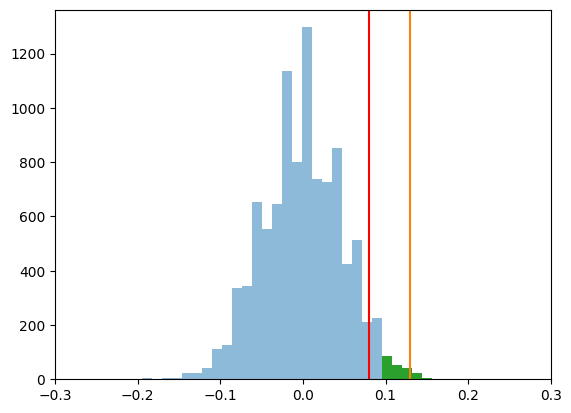

In [8]:
plt.hist(ctrs_diff_null, bins=31, alpha=0.5)
_, _, bars = plt.hist(ctrs_diff_null, bins=31, color="C2")
for i in range(24):
    bars[i].remove()
q95 = np.quantile(ctrs_diff_null, 0.95)
plt.axvline(q95, color="r")
plt.axvline(np.mean(ctrs_diff_obs), color="C1")
plt.xlim([-0.3, 0.3]);

power: is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. [wikipedia]

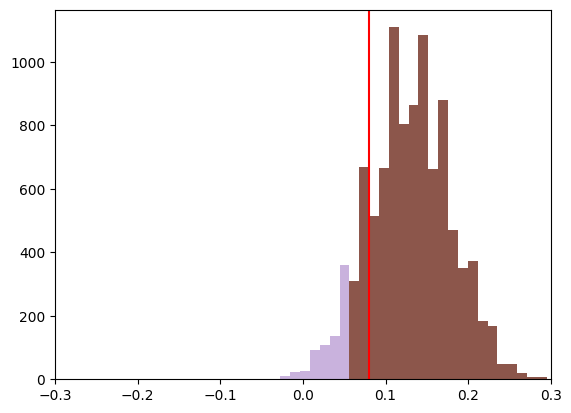

In [9]:
plt.hist(ctrs_diff_obs, bins=31, color="C4", alpha=0.5)
_, _, bars = plt.hist(ctrs_diff_obs, bins=31, color="C5")
for i in range(11):
    bars[i].remove()
q95 = np.quantile(ctrs_diff_null, 0.95)
plt.axvline(q95, color="r")
plt.xlim([-0.3, 0.3]);

In [10]:
power = 1 - percentileofscore(ctrs_diff_obs, q95)/100
power

0.8347

In [11]:
def plot(ctrs_diff_null, ctrs_diff_obs, legends, show_sig_lvl=False, show_sig_lvl_n_bars=0, show_power=False, show_power_n_bars=0):
    if not (show_sig_lvl and show_power):
        alpha = 0.5

    q95 = np.quantile(ctrs_diff_null, 0.95)

    plt.hist(ctrs_diff_null, bins=31, alpha=0.2)

    if show_sig_lvl:
        plt.title(f"Significance level = 0.05")
        _, _, bars = plt.hist(ctrs_diff_null, bins=31, alpha=1, color="C2")
        for i in range(show_sig_lvl_n_bars):
            bars[i].remove()

    plt.hist(ctrs_diff_obs, bins=31, color="C4", alpha=0.2)

    if show_power:
        power = 1 - percentileofscore(ctrs_diff_obs, q95)/100
        plt.title(f"Power = {power}")
        _, _, bars = plt.hist(ctrs_diff_obs, bins=31, alpha=1, color="C5")
        for i in range(show_power_n_bars):
            bars[i].remove()


    plt.axvline(q95, color="r")

    plt.legend(legends);

underpowered experiment

In [12]:
get_ctr_a = CTR(0.37, seed=1)
get_ctr_b = CTR(0.5, seed=1)

ctrs_diff_null = [get_ctr_a(50) - get_ctr_a(50) for _ in range(10_000)]
ctrs_diff_obs = [get_ctr_b(50) - get_ctr_a(50) for _ in range(10_000)]

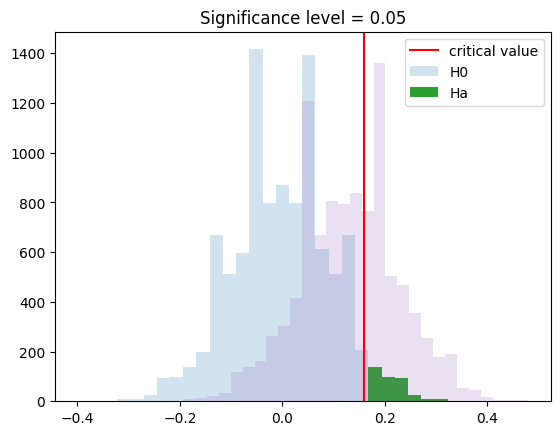

In [13]:
plot(ctrs_diff_null, ctrs_diff_obs, legends = ["critical value", "H0", "Ha"],
    show_sig_lvl=True, show_sig_lvl_n_bars=22)

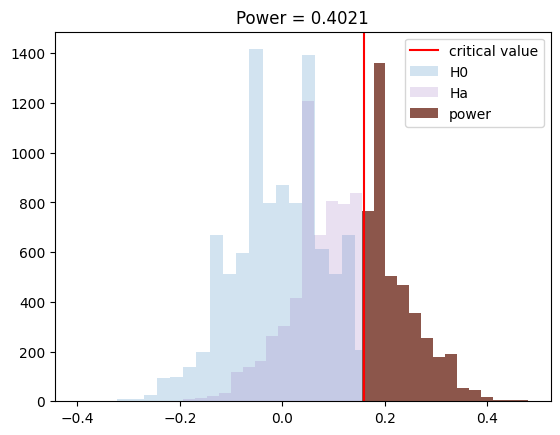

In [14]:
plot(ctrs_diff_null, ctrs_diff_obs, legends = ["critical value", "H0", "Ha", "power"],
     show_power=True, show_power_n_bars=17)

In [15]:
get_ctr_a = CTR(0.47, seed=1)
get_ctr_b = CTR(0.5, seed=1)

ctrs_diff_null = [get_ctr_a(5000) - get_ctr_a(5000) for _ in range(10_000)]
ctrs_diff_obs = [get_ctr_b(5000) - get_ctr_a(5000) for _ in range(10_000)]

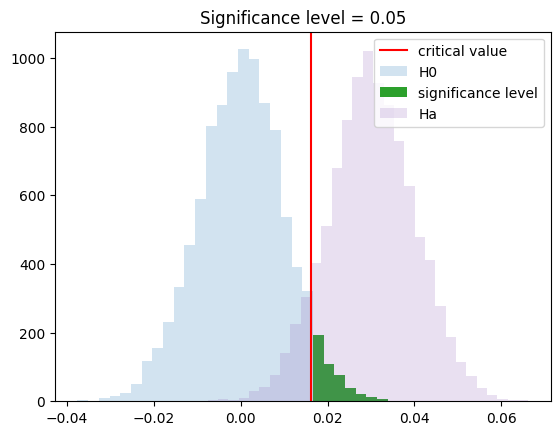

In [16]:
plot(ctrs_diff_null, ctrs_diff_obs, legends = ["critical value", "H0", "significance level", "Ha"],
     show_sig_lvl=True, show_sig_lvl_n_bars=22)

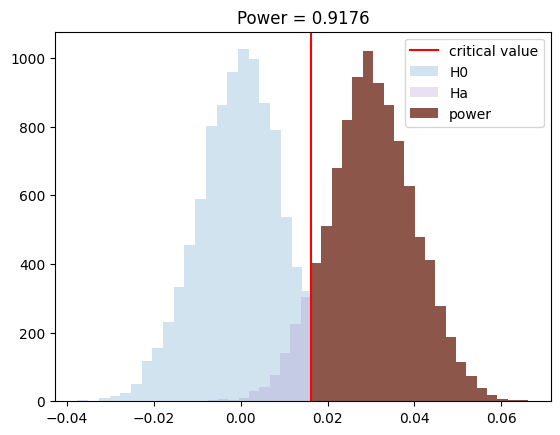

In [17]:
plot(ctrs_diff_null, ctrs_diff_obs, legends = ["critical value", "H0", "Ha", "power"],
     show_power=True, show_power_n_bars=10)


practical significance